스팸 메일 분류하기  
https://wikidocs.net/22894

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [4]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
data.isnull().values.any()

False

In [8]:
# 중복 확인
data['v2'].nunique(), data['v1'].nunique()

(5169, 2)

In [9]:
# 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True) 

In [10]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


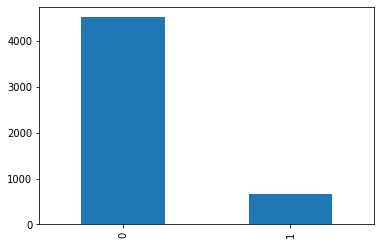

In [11]:
data['v1'].value_counts().plot(kind='bar')

In [12]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [13]:
# v2 : X, v1 : y
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data)  # 단어를 숫자값, 인덱스로 변환하여 저장

In [15]:
sequences[:5]

[[47,
  433,
  4013,
  780,
  705,
  662,
  64,
  8,
  1202,
  94,
  121,
  434,
  1203,
  142,
  2712,
  1204,
  68,
  57,
  4014,
  137],
 [49, 306, 1364, 435, 6, 1767],
 [53,
  537,
  8,
  20,
  4,
  1016,
  934,
  2,
  220,
  2713,
  1365,
  706,
  2714,
  2715,
  267,
  2716,
  70,
  2713,
  2,
  2717,
  2,
  359,
  537,
  604,
  1205,
  82,
  436,
  185,
  707,
  437,
  4015],
 [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152],
 [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]

In [16]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

In [17]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [18]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


In [19]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


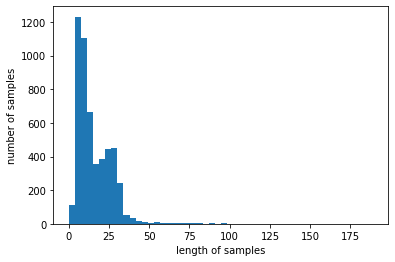

In [20]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
max_len = 189
# 전체 데이터셋의 길이를 max_len으로.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [22]:
X_test = data[n_of_train:]  # X_data에서 뒤의 1034개
y_test = np.array(y_data[n_of_train:])  # y_data에서 뒤의 1034개
X_train = data[:n_of_train]  # X_data에서 앞의 4135개
y_train = np.array(y_data[:n_of_train])  # y_data에서 앞의 4135개

In [23]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 9s 158ms/step - loss: 0.3915 - acc: 0.8752 - val_loss: 0.2448 - val_acc: 0.9383
Epoch 2/4
52/52 [==============================] - 8s 151ms/step - loss: 0.1358 - acc: 0.9692 - val_loss: 0.1025 - val_acc: 0.9698
Epoch 3/4
52/52 [==============================] - 8s 151ms/step - loss: 0.0633 - acc: 0.9870 - val_loss: 0.0902 - val_acc: 0.9794
Epoch 4/4
52/52 [==============================] - 8s 151ms/step - loss: 0.0464 - acc: 0.9894 - val_loss: 0.0627 - val_acc: 0.9831


In [25]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 14ms/step - loss: 0.0666 - acc: 0.9845

 테스트 정확도: 0.9845


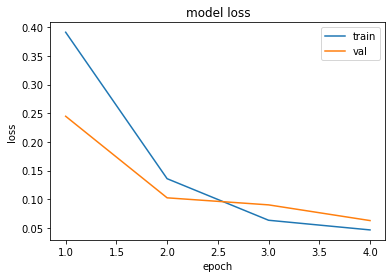

In [26]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()